In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

CORREÇÃO PARA NA ALTO: LIVRO DO NOVOTNY (NANO OPTICS) CAPÍTULO 3 (NECESSÁRIO IMPLEMENTAR)

In [118]:
c = 3.0e8  # (m/s)
density = 1850  # kg/m³ (SiO2)
kB = 1.38e-23 # J/K
epsilon_0 = 8.854187817e-12 # (C^2)*(N^-1)*(m^-2)
n_md = 1  # medium refractive index
n_p = 1.46 # particle refractive index
R = 78e-9  # particle radius (m)
T = 297 # K
lamb = 780e-9  # (m)
NA = 0.13
P = 200e-3 # Total Power (W)
m_gas = 4.81e-26 # molecular mass of air
Pressure = 1013.25 #mbar (1 atm)

In [119]:
k = 2*np.pi/lamb
w_0 = 2.5e-6
m_rri = n_p/n_md #relative refractive index
z_R = n_md*w_0/NA #rayleigh range
volume = (4/3) * np.pi * (R**3)
m = density * volume  # kg
v_0p = np.sqrt(3*kB*T/m) #velocidade térmica média da nanopartícula

In [120]:
def Gamma_chang(radius, Pressure_mbar): #essa pressão foi uma função retirada do repositório https://github.com/AshleySetter/optoanalysis/blob/master/Damping_radius_relation.ipynb
    Press = 100*Pressure_mbar
    ave_velocity = (8*kB*T/(np.pi*m_gas))**(1/2)
    Gamma0 = 8*Press/(np.pi*ave_velocity*radius*density)/2
    return 2*Gamma0

gamma = Gamma_chang(R,Pressure)

D = kB*T/gamma

def R_curv(z):
    z_safe = np.where(z == 0, 1e-40, z)       #Isso aqui impede que o código quebre em z = 0 substituindo esse
    return z_safe*(1+((z_R**2)/(z_safe**2)))  #ponto por um outro valor muito pequeno diferente de zero.

def gouy_phase(z):
    return np.arctan(z/z_R)

def w(z):
    return w_0*((1+((z**2)/(z_R**2)))**(1/2))

def I(E):
    return c*epsilon_0*(abs(E)**2)/2

CORRIGIR OS MODOS HERMITE E ADICIONAR OS MODOS LAGUERRE

In [121]:
d=50e-6

#d=0

#def E(x,y,z):
#    E_0 = (np.sqrt(2*P/(np.pi*(w_0**2)*c*epsilon_0)))
#    return E_0*(w_0/w(z-d/2))*np.exp((-((x**2)+(y**2)))/(w(z-d/2)**2))*np.exp(-1j*(k*(z-d/2)+k*(((x**2)+(y**2))/(2*R_curv(z-d/2))) - gouy_phase(z-d/2)))

def E(x,y,z):
    E_01 = (np.sqrt(P/(np.pi*(w_0**2)*c*epsilon_0)))
    E_02 = (np.sqrt(P/(np.pi*(w_0**2)*c*epsilon_0)))
    E1 = E_01*(w_0/w(z-d/2))*np.exp((-((x**2)+(y**2)))/(w(z-d/2)**2))*np.exp(-1j*(k*(z-d/2)+k*(((x**2)+(y**2))/(2*R_curv(z-d/2))) - gouy_phase(z-d/2)))
    E2 = E_02*(w_0/w(z+d/2))*np.exp((-((x**2)+(y**2)))/(w(z+d/2)**2))*np.exp(1j*(k*(z+d/2)+k*(((x**2)+(y**2))/(2*R_curv(z+d/2))) - gouy_phase(z+d/2)))
    return E1 + E2

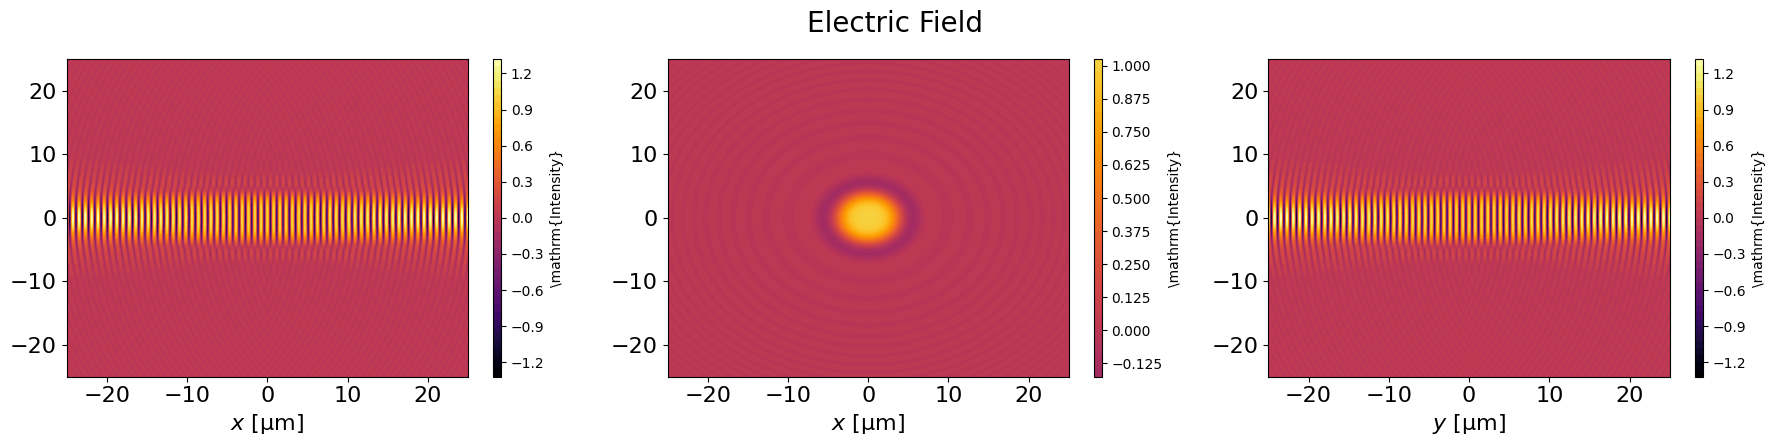

In [122]:
x = np.linspace(-10*w_0,10*w_0,1000)
y = np.linspace(-10*w_0,10*w_0,1000)
z = np.linspace(-25e-6,25e-6,3000)
E_max = E(0,0,0).real

tamanho_leg = 16

fig, axs = plt.subplots(1, 3, figsize=(18, 4.5))
fig.suptitle("Electric Field",fontsize=20)

def norm_E(): #apenas define a normalização das escalas de cor dos plots do campo E
    X, Z = np.meshgrid(x, z)
    E_val_XZ = E(X, 0, Z).real / E_max
    X, Y = np.meshgrid(x, y)
    E_val_XY = E(X, Y, 0).real / E_max
    Y, Z = np.meshgrid(y, z)
    E_val_YZ = E(0, Y, Z).real / E_max
    
    Emin = min(E_val_XZ.min(), E_val_XY.min(), E_val_YZ.min())
    Emax = max(E_val_XZ.max(), E_val_XY.max(), E_val_YZ.max())
    
    return Emin,Emax

X,Z = np.meshgrid(x,z)
E_XZ = E(X,0,Z).real
contour = axs[0].contourf(Z*1e6, X*1e6, E_XZ/E_max, levels=50, cmap="inferno", vmin = norm_E()[0], vmax = norm_E()[1])
fig.colorbar(contour, ax=axs[0], label=r'\mathrm{Intensity}', aspect = 40)
axs[0].set_xlabel(r'$z\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[0].set_xlabel(r'$x\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[0].tick_params(axis='x', labelsize=tamanho_leg)
axs[0].tick_params(axis='y', labelsize=tamanho_leg)
axs[0].set_xlim(-25,25)
axs[0].set_ylim(-25,25)

X,Y = np.meshgrid(x,y)
E_XY = E(X,Y,0).real
contour = axs[1].contourf(Y*1e6, X*1e6, E_XY/E_max, levels=50, cmap="inferno", vmin = norm_E()[0], vmax = norm_E()[1])
fig.colorbar(contour, ax=axs[1], label=r'\mathrm{Intensity}', aspect = 40)
axs[1].set_xlabel(r'$y\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[1].set_xlabel(r'$x\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[1].tick_params(axis='x', labelsize=tamanho_leg)
axs[1].tick_params(axis='y', labelsize=tamanho_leg)
axs[1].set_xlim(-25,25)
axs[1].set_ylim(-25,25)

Y,Z = np.meshgrid(y,z)
E_YZ = E(0,Y,Z).real
contour = axs[2].contourf(Z*1e6, Y*1e6, E_XZ/E_max, levels=50, cmap="inferno", vmin = norm_E()[0], vmax = norm_E()[1])
fig.colorbar(contour, ax=axs[2], label=r'\mathrm{Intensity}', aspect = 40)
axs[2].set_xlabel(r'$z\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[2].set_xlabel(r'$y\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[2].tick_params(axis='x', labelsize=tamanho_leg)
axs[2].tick_params(axis='y', labelsize=tamanho_leg)
axs[2].set_xlim(-25,25)
axs[2].set_ylim(-25,25)

plt.tight_layout()
#plt.savefig("Electric_field_counter.pdf", format='pdf', dpi=3000)
plt.show()

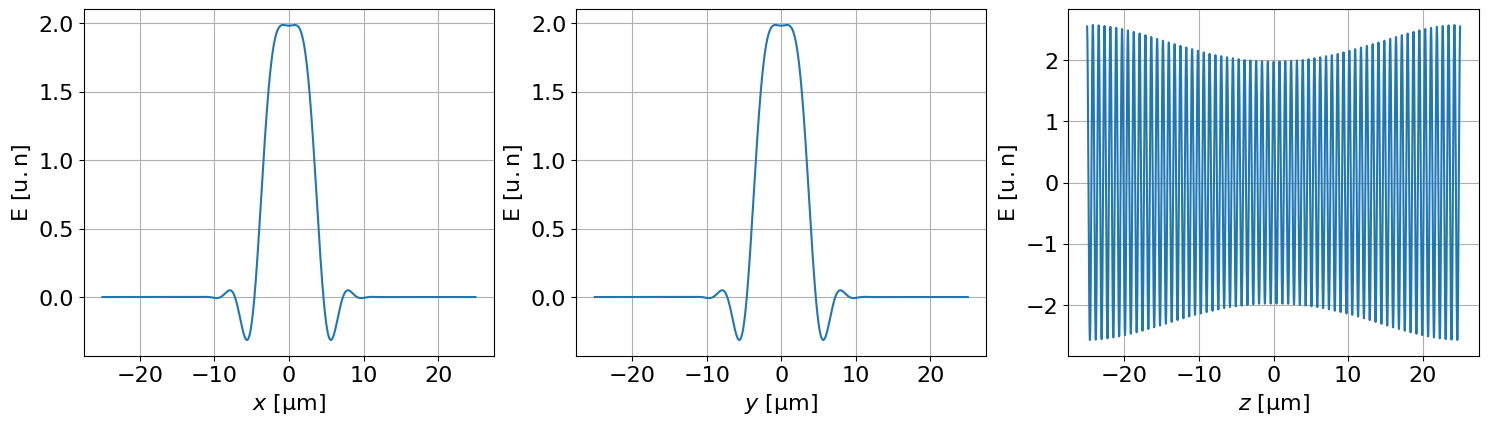

In [123]:
fig, axs = plt.subplots(1, 3, figsize=(18,4.5))

tamanho_leg = 16

axs[0].plot(x*1e6,E(x,0,0).real*1e-6)
axs[0].set_xlabel(r'$x\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[0].set_ylabel(r'$\mathrm{E\ [u.n]}$', fontsize=tamanho_leg)
axs[0].tick_params(axis='x', labelsize=tamanho_leg)
axs[0].tick_params(axis='y', labelsize=tamanho_leg)
axs[0].grid(True)

axs[1].plot(y*1e6,E(0,y,0).real*1e-6)
axs[1].set_xlabel(r'$y\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[1].set_ylabel(r'$\mathrm{E\ [u.n]}$', fontsize=tamanho_leg)
axs[1].tick_params(axis='x', labelsize=tamanho_leg)
axs[1].tick_params(axis='y', labelsize=tamanho_leg)
axs[1].grid(True)

axs[2].plot(z*1e6,E(0,0,z).real*1e-6)
axs[2].set_xlabel(r'$z\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
axs[2].set_ylabel(r'$\mathrm{E\ [u.n]}$', fontsize=tamanho_leg)
axs[2].tick_params(axis='x', labelsize=tamanho_leg)
axs[2].tick_params(axis='y', labelsize=tamanho_leg)
axs[2].grid(True)

plt.show()

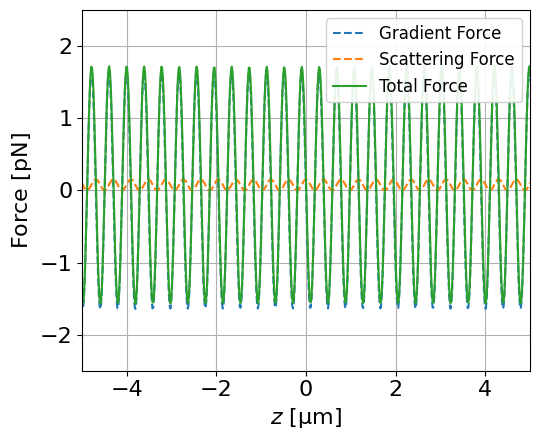

In [124]:
I_x, I_y, I_z = I(E(x, 0, 0)), I(E(0, y, 0)), I(E(0, 0, z))

F_scatt_z = ((128*(np.pi**5)*(n_md**5)*(R**6))/(3*c*(lamb**4)))*((((m_rri**2)-1)/((m_rri**2)+2))**2)*I_z

F_grad_x = (2*np.pi*n_md*(R**3)/c)*(((m_rri**2 )-1)/((m_rri**2)+2))*np.gradient(I_x, x)
F_grad_y = (2*np.pi*n_md*(R**3)/c)*(((m_rri**2)-1)/((m_rri**2)+2))*np.gradient(I_y, y)
F_grad_z = (2*np.pi*n_md*(R**3)/c)*(((m_rri**2)-1)/((m_rri**2)+2))*np.gradient(I_z, z)

tamanho_leg = 16
tamanho_leg_2 = 22

#fig, axs = plt.subplots(1, 3, figsize=(18, 5.5),sharey=True)
##fig.suptitle("Force Relations", fontsize=27)
#
#axs[0].plot(x/w_0, 10e12*(F_grad_x), label = "Total Force (Gradient)")
#axs[0].grid(True)
#axs[0].set_xlabel(r'$x\ \mathrm{[w_0]}$',fontsize=tamanho_leg_2)
#axs[0].set_ylabel(r'$\text{Force}\ \mathrm{[pN]}$',fontsize=tamanho_leg_2)
#axs[0].set_xlim(-5,5)
#axs[0].set_ylim(-80,80)
#axs[0].tick_params(axis='x', labelsize=tamanho_leg_2)
#axs[0].tick_params(axis='y', labelsize=tamanho_leg_2)
#
#axs[1].plot(y/w_0, 10e12*(F_grad_y), label = "Total Force")
#axs[1].grid(True)
#axs[1].set_xlabel(r'$y\ \mathrm{[w_0]}$', fontsize=tamanho_leg_2)
#axs[1].set_xlim(-5,5)
##axs[1].set_ylim(-0.4,0.4)
#axs[1].tick_params(axis='x', labelsize=tamanho_leg_2)
#
#axs[2].plot(z/z_R, 10e12*F_grad_z, '--', label = "Gradient Force")
#axs[2].plot(z/z_R, 10e12*F_scatt_z,'--', label = "Scattering Force")
#axs[2].plot(z/z_R, 10e12*(F_grad_z + F_scatt_z), label = "Total Force")
#axs[2].grid(True)
#axs[2].set_xlabel(r'$z\ \mathrm{[z_R]}$', fontsize=tamanho_leg_2)
#axs[2].set_xlim(-5,5)
##axs[2].set_ylim(-0.4,0.4)
#axs[2].tick_params(axis='x', labelsize=tamanho_leg_2)

plt.figure(figsize=(5.5,4.5))
plt.plot(z*1e6, 10e12*F_grad_z, '--', label = "Gradient Force")
plt.plot(z*1e6, 10e12*F_scatt_z,'--', label = "Scattering Force")
plt.plot(z*1e6, 10e12*(F_grad_z + F_scatt_z), label = "Total Force")
plt.grid(True)
plt.xlabel(r'$z\ \mathrm{[\mu m]}$', fontsize=tamanho_leg)
plt.ylabel(r'$\text{Force}\ \mathrm{[pN]}$',fontsize=tamanho_leg)
plt.tick_params(axis='x', labelsize=tamanho_leg)
plt.tick_params(axis='y', labelsize=tamanho_leg)
plt.xlim(-5,5)
plt.ylim(-2.5,2.5)
plt.grid(True)

plt.legend(fontsize=12,loc='upper right', framealpha = 0.9)

plt.tight_layout()
#plt.savefig("z_forces_counter_NA013.pdf", format='pdf', dpi=3000)
plt.show()